# Red cell counter (Granulometry)

Using morphological operators

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Util

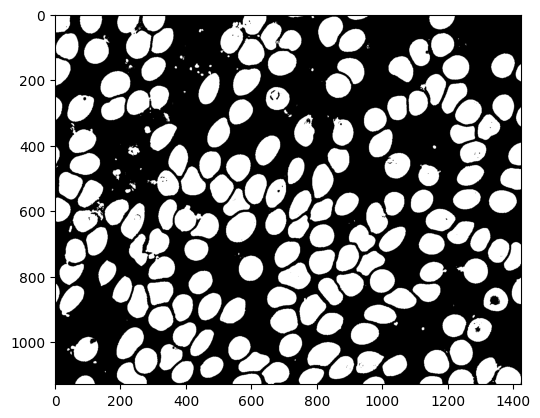

In [4]:
image = cv2.imread("../../images/BloodCells.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
image = np.logical_not(image)
plt.imshow(image, cmap="gray")


In [5]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [6]:
def within_image(img, coor):
    return coor[0] >= 0 and coor[0] < img.shape[0] and coor[1] >= 0 and coor[1] < img.shape[1]

In [7]:
def structural_array(structural_element, origin):
    c = []
    for i in range(structural_element.shape[0]):
        for j in range(structural_element.shape[1]):
            if structural_element[i,j]:
                c.append(np.subtract([i,j], origin))
    return c

## Morphological Operations

In [8]:
def dilate(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1
            nImg[i, j] = trueCounter > 0
    return nImg

In [9]:
def erode(img, struct_array):
    nImg = img.copy()
    h,w = img.shape
    for i in range(h):
        for j in range(w):
            trueCounter = 0
            for c in struct_array:
                u = np.add([i,j], c)
                if within_image(img, u) and img[u[0], u[1]]:
                    trueCounter += 1 #Doesn't work for borders yet
            nImg[i, j] = trueCounter == struct_array.shape[0] 
    return nImg

In [10]:
def open(img, struct_array):
    eroded = erode(img, struct_array)
    dilated = dilate(eroded, struct_array)
    return dilated

In [11]:
def close(img, struct_array):
    dilated = dilate(img, struct_array)
    eroded = erode(dilated, struct_array)
    return eroded

# Main cell

In [12]:

structural = [  [0,0,0,0,1,1,0,0,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,1,1,1,1,1,1,1,1,0],
                [1,1,1,1,1,1,1,1,1,1],
                [1,1,1,1,1,1,1,1,1,1],
                [0,1,1,1,1,1,1,1,1,0],
                [0,0,1,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,1,0,0,0],
                [0,0,0,0,1,1,0,0,0,0]]
"""
structural = [
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]                
"""

structural = np.array(structural)
width = structural.shape[0]
print(structural.shape)

(10, 10)


In [13]:
o = open(image, np.array(structural_array(structural, [5, 5])))
plt.imshow(o, cmap="gray")

KeyboardInterrupt: 

In [30]:
h,w = image.shape

visited = np.zeros((h,w))
cells = []
dirs = [[-1, -1], [-1, 0], [-1, 1], [0, -1], [0, 1], [1, -1], [1, 0], [1, 1]]

def isVisited(index):
    if(visited[index[0], index[1]]):
        return True
    else:
        return False
def isWithinImage(i, j):
        return i >= 0 and j >= 0 and i < image.shape[0] and j < image.shape[1]

def BFS(x,y): #coordenadas de inicio
    print("----bfs")
    
    visited = np.zeros((h,w))
    queue = []
    

    visited[x,y] = 1
    queue.append([x,y])
    while(queue):
        n = queue.pop(0)
        print(n)
        for neighbour in dirs:
            neighbour[0] = neighbour[0] + n[0]
            neighbour[1] = neighbour[1] + n[1]
            if isWithinImage(neighbour[0], neighbour[1]):
                if image[neighbour[0],neighbour[1]] == 1 and not isVisited(neighbour):
                    visited[neighbour[0], neighbour[1]] = 1
                    queue.append(neighbour)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j] == 1 and not isVisited([i,j]):
            visited[i,j] = 1
            BFS(i,j)
            

----bfs
[0, 0]
[0, 1]
[1, 2]
[3, 7]
[4, 11]
[13, 32]
[39, 97]
[118, 294]
[177, 443]
[531, 1330]
[1593, 3991]
[4780, 11971]
[14340, 35915]
[43025, 107755]
[129088, 323298]
[387304, 969994]
[581015, 1455140]
[1743222, 4365864]
[5230197, 13098923]
[15692185, 39300758]
[47081335, 117914247]
[141258350, 353778666]
[423818088, 1061443786]
[1271583392, 3184654756]
[1907568799, 4777467280]
[5723287589, 14333857424]
[17171606520, 43005939467]
[51520051351, 129030921313]
[154575851018, 387132076670]
[463774648734, 1161514180182]
[1391465247590, 3484896427000]
[4174819689986, 10455751048184]
[6957750185166, 17425543902184]
[22265139750304, 55762589900736]
[36180640120636, 90613677705104]
[116891559741880, 292752535211680]
[188557955318372, 472239566104504]
[566368750619896, 1418459022830896]
----bfs
[0, 1]
----bfs
[0, 2]
----bfs
[0, 3]
----bfs
[0, 4]
----bfs
[0, 5]
----bfs
[0, 6]
----bfs
[0, 7]
----bfs
[0, 8]
----bfs
[0, 9]
----bfs
[0, 10]
----bfs
[0, 11]
----bfs
[0, 12]
----bfs
[0, 13]
----bfs
[

KeyboardInterrupt: 